#**Pengolahan Non PySpark**

Sumber Dataset yang digunakan: https://www.kaggle.com/adityakadiwal/water-potability

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/FILE LATIHAN PYTHON")

!pwd

/content/drive/My Drive/FILE LATIHAN PYTHON


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
data=pd.read_csv('water.csv')
data.shape

(3276, 10)

In [ ]:
data.head(30)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [ ]:
#mengisi data yang kosong dengan nilai 0
data = data.fillna(0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73ab1e28d0>,
      dtype=object)

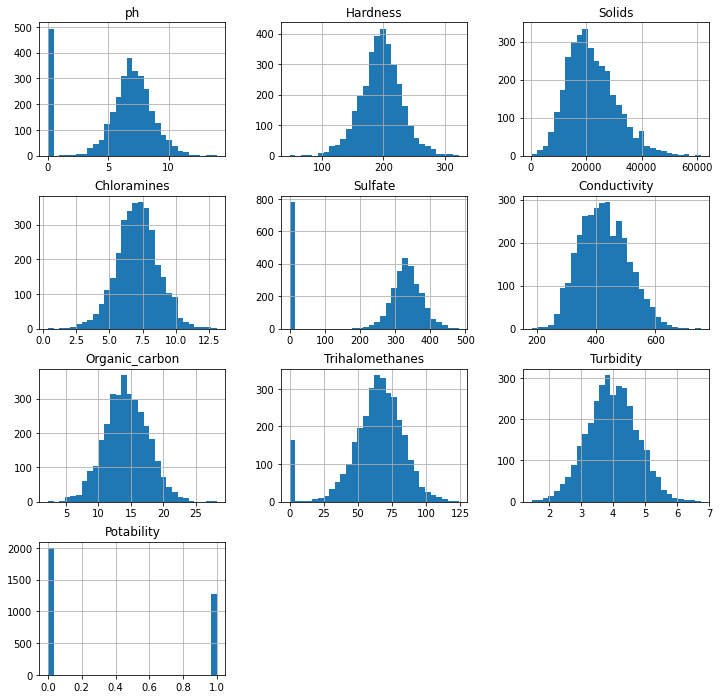

In [ ]:
#melihat variasi data
data.hist(bins=30, figsize=(12,12))

In [ ]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-2.058835,0.259195,-0.139471,0.112415,0.779002,1.708954,-1.180651,1.118394,-1.286298,0
1,-0.787841,-2.036414,-0.385987,-0.307694,-1.732306,2.062575,0.270597,-0.317742,0.684218,0
2,0.711270,0.847665,-0.240047,1.360594,-1.732306,-0.094032,0.781117,0.154899,-1.167365,0
3,0.785709,0.547651,0.000493,0.592008,0.699746,-0.778830,1.255134,1.743711,0.848412,0
4,1.050935,-0.464429,-0.460249,-0.363698,0.381159,-0.343939,-0.824357,-1.457357,0.138786,0


Variasi Data Testing 20%

In [ ]:
#Pemisahan Variabel Prediktor (X) dan Variabel Target (Y)
X1=data.iloc[:,0:8].values
Y1=data.iloc[:,9].values

#Pemisahan data Training dan Testing dengan testing 20% dan training 80%
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1, test_size = 0.2)

In [ ]:
#Klasifikasi dengan Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import time

#training data
start = time.time()

dtc = DecisionTreeClassifier()
dtc.fit(X_train1, Y_train1)
print('Waktu training:', (time.time() - start), 'detik')


Waktu training: 0.03302931785583496 detik


In [ ]:
#testing data
start = time.time()
Y_pred11 = dtc.predict(X_test1)

print('Accuracy = ', accuracy_score(Y_test1, Y_pred11))
print('Waktu uji akurasi:', (time.time() - start), 'detik')

print("=" *50)
print(classification_report(Y_test1,Y_pred11))

Accuracy =  0.573170731707317
Waktu uji akurasi: 0.003453969955444336 detik
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       395
           1       0.47      0.49      0.48       261

    accuracy                           0.57       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.57      0.58       656



Variasi data testing 30%

In [ ]:
#Pemisahan Variabel Prediktor (X) dan Variabel Target (Y)
X1=data.iloc[:,0:8].values
Y1=data.iloc[:,9].values

#Pemisahan data Training dan Testing dengan testing 30% dan training 70%
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1, test_size = 0.3)

In [ ]:
#Klasifikasi dengan Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import time

#training data
start = time.time()

dtc = DecisionTreeClassifier()
dtc.fit(X_train1, Y_train1)
print('Waktu testing:', (time.time() - start), 'detik')


Waktu testing: 0.032167673110961914 detik


In [ ]:
#testing data
start = time.time()
Y_pred11 = dtc.predict(X_test1)

print('Accuracy = ', accuracy_score(Y_test1, Y_pred11))
print('Waktu testing:', (time.time() - start), 'detik')

print("=" *50)
print(classification_report(Y_test1,Y_pred11))

Accuracy =  0.5768056968463886
Waktu testing: 0.0035974979400634766 detik
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       613
           1       0.44      0.45      0.45       370

    accuracy                           0.58       983
   macro avg       0.55      0.55      0.55       983
weighted avg       0.58      0.58      0.58       983



#**Pengolahan PySpark**

In [ ]:
#Install 
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.1/spark-2.4.1-bin-hadoop2.7.tgz
!tar xf spark-2.4.1-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-2.4.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

spark
!jps

563 Jps
494 SparkSubmit


In [ ]:
import pyspark
from pyspark.context import SparkContext
spark = SparkSession\
        .builder\
        .appName("Map Pada Spark")\
        .getOrCreate()
        
#sc = SparkContext.getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
from pyspark.sql import SQLContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import col

In [ ]:
from pyspark.sql import SparkSession

#set session pyspark untuk metode decision tree
spark = SparkSession.builder.appName("Decision Tree Classifier").getOrCreate()
spark = SparkSession(sc)

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
df = spark.read.csv('water.csv',inferSchema=True, header =True)
df.show(5)

+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+----------+
|               ph|          Hardness|            Solids|      Chloramines|           Sulfate|      Conductivity|    Organic_carbon|   Trihalomethanes|         Turbidity|Potability|
+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+----------+
|             null| 204.8904554713363|20791.318980747026|7.300211873184757|368.51644134980336| 564.3086541722439|  10.3797830780847|  86.9909704615088|2.9631353806316407|         0|
| 3.71608007538699|129.42292051494425|18630.057857970347|   6.635245883862|              null| 592.8853591348523|15.180013116357259| 56.32907628451764| 4.500656274942408|         0|
|8.099124189298397|224.23625939355776|19909.541732292393|9.275883602694089|              n

In [ ]:
df = df.na.fill(value=0)
df.show(5)

+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+----------+
|               ph|          Hardness|            Solids|      Chloramines|           Sulfate|      Conductivity|    Organic_carbon|   Trihalomethanes|         Turbidity|Potability|
+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+----------+
|              0.0| 204.8904554713363|20791.318980747026|7.300211873184757|368.51644134980336| 564.3086541722439|  10.3797830780847|  86.9909704615088|2.9631353806316407|         0|
| 3.71608007538699|129.42292051494425|18630.057857970347|   6.635245883862|               0.0| 592.8853591348523|15.180013116357259| 56.32907628451764| 4.500656274942408|         0|
|8.099124189298397|224.23625939355776|19909.541732292393|9.275883602694089|               

Variasi Data Testing 20%

In [ ]:
#set kolom menjadi satu array bernama features
vector_assembler = VectorAssembler(inputCols=['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity'],outputCol="Features")
df_temp = vector_assembler.transform(df)
df_temp.show(10)

#memilih kolom output
df = df_temp.drop('ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity')
df.show(10)
# set data training 80% dan testing 20%
(training,testing) = df.randomSplit([0.8,0.2])

+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+--------------------+
|                ph|          Hardness|            Solids|       Chloramines|           Sulfate|      Conductivity|    Organic_carbon|   Trihalomethanes|         Turbidity|Potability|            Features|
+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+--------------------+
|               0.0| 204.8904554713363|20791.318980747026| 7.300211873184757|368.51644134980336| 564.3086541722439|  10.3797830780847|  86.9909704615088|2.9631353806316407|         0|[0.0,204.89045547...|
|  3.71608007538699|129.42292051494425|18630.057857970347|    6.635245883862|               0.0| 592.8853591348523|15.180013116357259| 56.32907628451764| 4.500656274942408|        

In [ ]:
import time
from pyspark.ml.classification import DecisionTreeClassifier

start = time.time()

#training
dt = DecisionTreeClassifier(labelCol="Potability", featuresCol="Features")
model = dt.fit(training)

print('Waktu training:', (time.time() - start), 'detik')

Waktu training: 1.3260729312896729 detik


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

# testing
start = time.time()

predictions = model.transform(testing)
pred = predictions.select("prediction", "Potability")

evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print('Waktu testing:', (time.time() - start), 'detik')
print("="*50)
pred.show()
print("Tingkat Error = %g " % (1.0 - accuracy))
print("Nilai Akurasi= %g " % accuracy)


Waktu testing: 0.5825467109680176 detik
+----------+----------+
|prediction|Potability|
+----------+----------+
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       1.0|         0|
|       1.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
+----------+----------+
only showing top 20 rows

Tingkat Error = 0.359756 
Nilai Akurasi= 0.640244 


Variasi Data Testing 30%

In [ ]:
#set kolom menjadi satu array bernama features
vector_assembler = VectorAssembler(inputCols=['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity'],outputCol="Features")
df_temp = vector_assembler.transform(df)
df_temp.show(10)

#memilih kolom output
df = df_temp.drop('ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity')
df.show(10)
# set data training 70% dan testing 30%
(training,testing) = df.randomSplit([0.7,0.3])

+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+--------------------+
|                ph|          Hardness|            Solids|       Chloramines|           Sulfate|      Conductivity|    Organic_carbon|   Trihalomethanes|         Turbidity|Potability|            Features|
+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+--------------------+
|               0.0| 204.8904554713363|20791.318980747026| 7.300211873184757|368.51644134980336| 564.3086541722439|  10.3797830780847|  86.9909704615088|2.9631353806316407|         0|[0.0,204.89045547...|
|  3.71608007538699|129.42292051494425|18630.057857970347|    6.635245883862|               0.0| 592.8853591348523|15.180013116357259| 56.32907628451764| 4.500656274942408|        

In [ ]:
import time
from pyspark.ml.classification import DecisionTreeClassifier

start = time.time()

#training
dt = DecisionTreeClassifier(labelCol="Potability", featuresCol="Features")
model = dt.fit(training)

print('Waktu training:', (time.time() - start), 'detik')

Waktu training: 1.2649762630462646 detik


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

# testing
start = time.time()

predictions = model.transform(testing)
pred = predictions.select("prediction", "Potability")

evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print('Waktu testing:', (time.time() - start), 'detik')
print("="*50)
pred.show()
print("Tingkat Error = %g " % (1.0 - accuracy))
print("Nilai Akurasi= %g " % accuracy)


Waktu testing: 0.6088283061981201 detik
+----------+----------+
|prediction|Potability|
+----------+----------+
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       1.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       1.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       1.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       0.0|         0|
|       1.0|         0|
|       0.0|         0|
+----------+----------+
only showing top 20 rows

Tingkat Error = 0.372898 
Nilai Akurasi= 0.627102 
